# Module 14 - Root Finding and Optimization


## Goals

- Root finding and optimization

## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## Root Finding - Newton-Raphson method

One way to find the minima/maxima of a given function, $g(x)$, is to find the location(s) where the function's derivative are zero

\begin{equation}
    \text{min}\left( g(x) \right ) \Longrightarrow \frac{dg(x)}{dx} = f(x) = 0.
\end{equation}

One can iteratively find the the locations where $f(x) = 0$, also known as finding its roots, using a method such as Newton-Raphson, where we start with a guess for the location of a root, $x_i$, and use the tangent of the function at this point, $\frac{df(x_i)}{dx}$, to find a new guess, $x_{i+1}$,

\begin{equation}
    x_{i+1} = x_i - \frac{f(x_i)}{df(x_i)/dx}
\end{equation}

until we reach a desired convergence.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" width=400px>

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br><br>
Create a function, `RootFinder(f, dfdx, guess, tol, maxiter)`, that finds the root of a generic function using the Newton-Raphson method. The input to `RootFinder()` should be a generic function, `f`, its first derivative, `dfdx`, the initial guess for the root (the zero crossing), the desired tolerance, `tol`, and the maximum number of iterations before stopping, `maxiter`. Test your function on the generic function $f(x) = x^2 - 2$.
<br><br>
**Extra challenge** - Create a plot/animation that graphically shows the iterative process of finding each new guess (show the tangent line projected to the x axis).
</div>

<IPython.core.display.Javascript object>


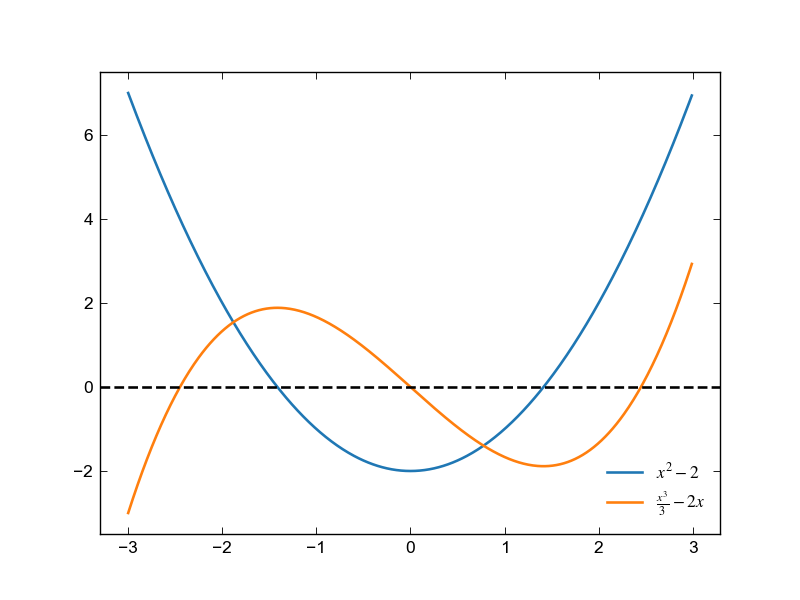

In [3]:
plt.figure()
x = np.arange(-3,3,0.01)
plt.plot(x,x**2-2,label=r"$x^2-2$")
plt.plot(x,1/3*x**3-2*x,label=r"$\frac{x^3}{3}-2x$")
plt.axhline(y=0,color='k',ls='--')
plt.legend()

In [4]:
def RootFinder(f, dfdx, guess=1.0, tol=1E-3, maxiter=1000):
    xp = guess - f(guess)/dfdx(guess)
    delta = np.abs(f(xp) - f(guess))
    i = 0
    while (delta > tol and i < maxiter):
        x = xp - f(xp)/dfdx(xp)
        delta = np.abs(f(x) - f(xp))
        xp = x
        i+=1
    print("Converged to desired tolerance, {0}, after {1} iterations".format(tol, i))
    return xp

In [10]:
def f(x):
    return x*x - 2.0

def dfdx(x):
    return 2.0*x

RootFinder(f, dfdx, 1.0)

Converged to desired tolerance, 0.001, after 3 iterations


1.4142135623746899

In [7]:
def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

RootFinder(f, dfdx, 3.0)

Converged to desired tolerance, 0.001, after 1 iterations


3.141592653300477

## The secant method

If the second derivative of the function, $\frac{d^2g(x)}{dx^2} = \frac{df(x)}{dx}$, is not available or cannot be readily calculated, one can use the secand method to approximate the slope of the function in the Newton-Raphson method:

\begin{equation}
    \frac{df(x_i)}{dx} \approx \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}.
\end{equation}

This is known as the secant method. For this method to work, you need to provide the algorithm with two initial guesses, $x_0$ and $x_1$.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br><br>
Create a new function, `RootFinderSec()`, that uses the secant method to find the root of a generic function using the Newton-Raphson method. For this method you don't need the first derivative of the input function, but need to provide two initial guesses. Does this method require significant more iterations to reach the same tolerance compared the original Newton-Raphson method?
<br/>
</div>

In [8]:
def RootFinderSec(f, guess1=1.0, guess2=2.0, tol=1E-3, maxiter=1000):
    dfdx = (f(guess2) - f(guess1))/(guess2 - guess1)
    xp = guess2 - f(guess2)/dfdx
    xp_old = guess2
    delta = np.abs(f(xp) - f(guess2))
    i = 0
    while (delta > tol and i < maxiter):
        dfdx = (f(xp) - f(xp_old))/(xp - xp_old)
        x = xp - f(xp)/dfdx
        delta = np.abs(f(x) - f(xp))
        xp_old = xp
        xp = x
        i+=1
    print("Converged to desired tolerance, {0}, after {1} iterations".format(tol, i))
    return xp

In [9]:
def f(x):
    return x*x - 2.0

def dfdx(x):
    return 2.0*x

RootFinderSec(f, 1.0, 2.0)

Converged to desired tolerance, 0.001, after 4 iterations


1.4142135620573204

In [10]:
def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

RootFinderSec(f, 3.0, 4.0)

Converged to desired tolerance, 0.001, after 3 iterations


3.1415926535897367

In [11]:
from scipy.optimize import basinhopping

<IPython.core.display.Javascript object>


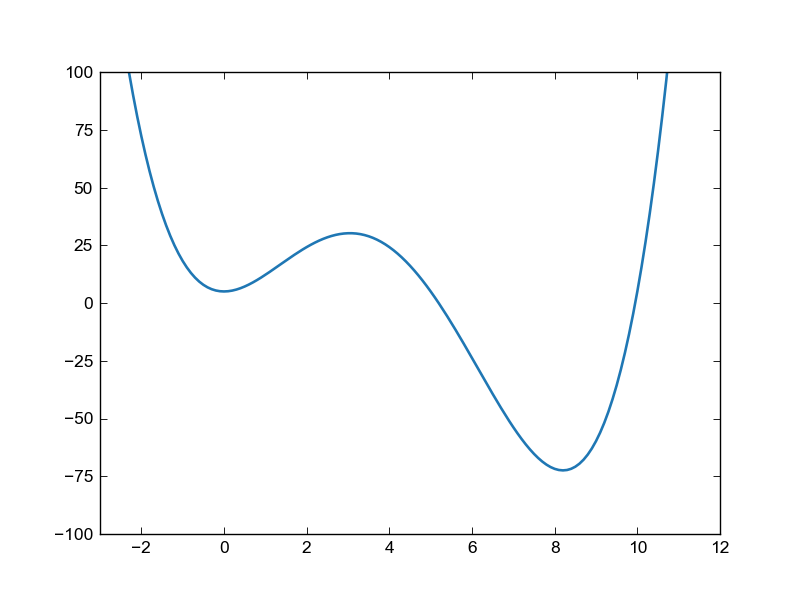

Converged to desired tolerance, 0.001, after 4 iterations
Local minimum = 8.201941015958575, Global minimum [ 8.20194106]


In [14]:
def f2(x):
    return -3*x**3 + 10*x**2 + 0.2*x**4 + 5

def f2p(x):
    return -9*x**2 + 20*x + 0.8*x**3

x =np.arange(-10,20,0.1)
plt.figure()
plt.plot(x, f2(x))
plt.xlim(-3,12)
plt.ylim(-100,100)

local_min = RootFinderSec(f2p, 7.0, 8.0)
global_min = basinhopping(f2, 1.0, niter=1000)
print('Local minimum = {0}, Global minimum {1}'.format(local_min, global_min.x))
